The following notebook was runned in a docker container with the following commands:

```
docker run -it -p 8888:8888 -p 6006:6006 -v `pwd`:/space/ -w /space/ --rm --name md waleedka/modern-deep-learning jupyter notebook --ip=0.0.0.0 --allow-root
```

The following code is adapted from http://scikit-learn.org/stable/user_guide.html

# Argmax and Argmin

$$ \underset{x \in D}{\operatorname{argmax}} f(x) = \{ x \mid f(x) \ge f(y), \forall y \in D \} $$

See [Argmax and Max Calculus](https://www.cs.ubc.ca/~schmidtm/Documents/2016_540_Argmax.pdf)

# Supervised learning

## Generalized Linear Models

### Ordinary Least Squares

$$ \underset{w}{min\,} {|| X w - y||_2}^2 $$

where $$ w = (w_1, ..., w_p) $$

If $ X $ is a matrix of size $ (n, p) $ this method has a
cost of $ O(n p^2) $, assuming that $ n \geq p $.

### Ridge Regression

$$ \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2} $$

where 

$$ \alpha \gt 0 $$

$$ ||w||_2 = ? $$

### Lasso

$$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1} $$

where

$$ ||w||_1 = ? $$

### Elastic Net

$$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
    \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2} $$
    
where $ \rho $ is to control the convex combination of L1 and L2, a.k.a ``l1_ratio``

### Least Angle Regression (LARS)

Least-angle regression (LARS) is a regression algorithm for
high-dimensional data. LARS is similar to forward stepwise
regression. At each step, it finds the predictor most correlated with the
response. When there are multiple predictors having equal correlation, instead
of continuing along the same predictor, it proceeds in a direction equiangular
between the predictors.

In [1]:
from sklearn import linear_model

In [2]:
reg = linear_model.LinearRegression()

In [3]:
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
reg.coef_

array([ 0.5,  0.5])

array([[-0.41754641, -1.77515989,  0.71594702, ...,  1.70703123,
         0.8324983 ,  2.46379486],
       [-0.93357861, -0.10312673, -1.84339906, ...,  1.38878978,
         0.16315061, -0.16226576]])

(442, 1)
(442,)
Coefficients: 
 [ 294.72241201] [ 265.76407018] [ 249.82982428] [ 220.29558537] [ 294.72241201]
Super parameters: 
 () (0.10000000000000001,) (0.10000000000000001,) (0.10000000000000001, 0.997) (0.0,)
Mean squared error: 
 5594.52 5569.87 5558.29 5540.54 5594.52
Variance score: 
 -0.09 -0.08 -0.08 -0.08 -0.09


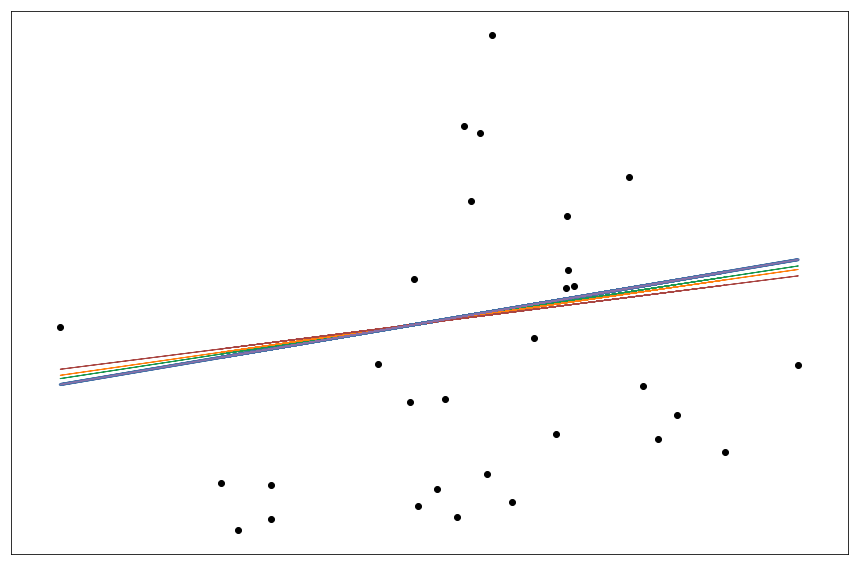

In [15]:
# based on http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# but added Ridge and Lasso
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# print(diabetes.data.shape)

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 5]
diabetes_Y = diabetes.target

print(diabetes_X.data.shape)
print(diabetes_Y.data.shape)

TEST_SET_SIZE = 30

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-TEST_SET_SIZE]
diabetes_X_test = diabetes_X[-TEST_SET_SIZE:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_Y[:-TEST_SET_SIZE]
diabetes_y_test = diabetes_Y[-TEST_SET_SIZE:]

# Create linear regression object
lr = linear_model.LinearRegression()
rg = linear_model.RidgeCV(alphas = [.1, .3, .5, .7, .9])
ls = linear_model.LassoCV(alphas = [.1, .3, .5, .7, .9])
en = linear_model.ElasticNetCV(alphas = [.1, .3, .5, .7, .9], l1_ratio = [.1, .3, .5, .7, .9, .99, .997])
la = linear_model.LarsCV()

# Train the model using the training sets
lr.fit(diabetes_X_train, diabetes_y_train)
rg.fit(diabetes_X_train, diabetes_y_train)
ls.fit(diabetes_X_train, diabetes_y_train)
en.fit(diabetes_X_train, diabetes_y_train)
la.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_lr = lr.predict(diabetes_X_test)
diabetes_y_pred_rg = rg.predict(diabetes_X_test)
diabetes_y_pred_ls = ls.predict(diabetes_X_test)
diabetes_y_pred_en = en.predict(diabetes_X_test)
diabetes_y_pred_la = la.predict(diabetes_X_test)


# The coefficients
print('Coefficients: \n', lr.coef_, rg.coef_, ls.coef_, en.coef_, la.coef_)

print('Super parameters: \n', (), (rg.alpha_,), (ls.alpha_,), (en.alpha_, en.l1_ratio_), (la.alpha_,))
# The mean squared error
print("Mean squared error: \n %.2f %.2f %.2f %.2f %.2f"
      % (mean_squared_error(diabetes_y_test, diabetes_y_pred_lr),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_rg),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_ls),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_en),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_la)
        ))
# Explained variance score: 1 is perfect prediction
print('Variance score: \n %.2f %.2f %.2f %.2f %.2f' % 
      (r2_score(diabetes_y_test, diabetes_y_pred_lr),
       r2_score(diabetes_y_test, diabetes_y_pred_rg),
       r2_score(diabetes_y_test, diabetes_y_pred_ls),
       r2_score(diabetes_y_test, diabetes_y_pred_en),
       r2_score(diabetes_y_test, diabetes_y_pred_la)
      ))

# Plot outputs
plt.rcParams["figure.figsize"] = [15.0, 10.0]
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# blue
plt.plot(diabetes_X_test, diabetes_y_pred_lr, color='#4572a7', linewidth=3, linestyle='solid')
# green
plt.plot(diabetes_X_test, diabetes_y_pred_rg, color='#1a9850', linewidth=1, linestyle='solid')
# orange
plt.plot(diabetes_X_test, diabetes_y_pred_ls, color='#ff7f0e', linewidth=1, linestyle='solid')
# red
plt.plot(diabetes_X_test, diabetes_y_pred_en, color='#aa4643', linewidth=1, linestyle='solid')
# purple
plt.plot(diabetes_X_test, diabetes_y_pred_la, color='#886fa8', linewidth=1, linestyle='solid')

plt.xticks(())
plt.yticks(())

plt.show()

(1000, 1)
(1000,)
Coefficients: 
 [ 5.66777418] [ 5.66232763] [ 5.56410341] [ 5.56268436] [ 5.66777418]
Super parameters: 
 () (0.90000000000000002,) (0.10000000000000001,) (0.10000000000000001, 0.997) (0.0,)
Mean squared error: 
 127.34 127.34 127.30 127.30 127.34
Variance score: 
 0.02 0.02 0.03 0.03 0.02


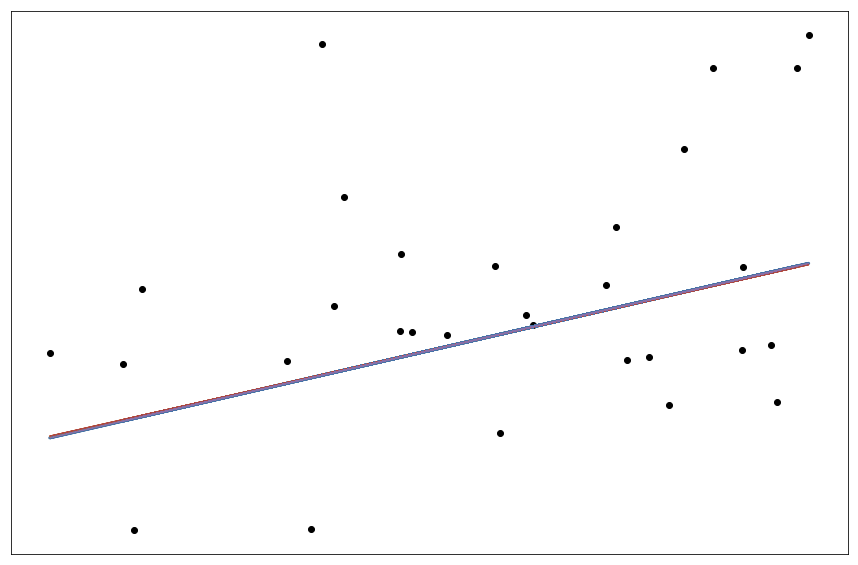

In [27]:
# based on http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# but added Ridge and Lasso
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
t_dis = np.random.standard_t(100, size=[2, 1000])
t_dis


t_dis[1] = t_dis[0] * 5 + t_dis[1] * 10

# Use only one feature
diabetes_X = t_dis[0].reshape(-1, 1)
diabetes_Y = t_dis[1]

print(diabetes_X.data.shape)
print(diabetes_Y.data.shape)

TEST_SET_SIZE = 30

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-TEST_SET_SIZE]
diabetes_X_test = diabetes_X[-TEST_SET_SIZE:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_Y[:-TEST_SET_SIZE]
diabetes_y_test = diabetes_Y[-TEST_SET_SIZE:]

# Create linear regression object
lr = linear_model.LinearRegression()
rg = linear_model.RidgeCV(alphas = [.1, .3, .5, .7, .9])
ls = linear_model.LassoCV(alphas = [.1, .3, .5, .7, .9])
en = linear_model.ElasticNetCV(alphas = [.1, .3, .5, .7, .9], l1_ratio = [.1, .3, .5, .7, .9, .99, .997])
la = linear_model.LarsCV()

# Train the model using the training sets
lr.fit(diabetes_X_train, diabetes_y_train)
rg.fit(diabetes_X_train, diabetes_y_train)
ls.fit(diabetes_X_train, diabetes_y_train)
en.fit(diabetes_X_train, diabetes_y_train)
la.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_lr = lr.predict(diabetes_X_test)
diabetes_y_pred_rg = rg.predict(diabetes_X_test)
diabetes_y_pred_ls = ls.predict(diabetes_X_test)
diabetes_y_pred_en = en.predict(diabetes_X_test)
diabetes_y_pred_la = la.predict(diabetes_X_test)


# The coefficients
print('Coefficients: \n', lr.coef_, rg.coef_, ls.coef_, en.coef_, la.coef_)

print('Super parameters: \n', (), (rg.alpha_,), (ls.alpha_,), (en.alpha_, en.l1_ratio_), (la.alpha_,))
# The mean squared error
print("Mean squared error: \n %.2f %.2f %.2f %.2f %.2f"
      % (mean_squared_error(diabetes_y_test, diabetes_y_pred_lr),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_rg),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_ls),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_en),
         mean_squared_error(diabetes_y_test, diabetes_y_pred_la)
        ))
# Explained variance score: 1 is perfect prediction
print('Variance score: \n %.2f %.2f %.2f %.2f %.2f' % 
      (r2_score(diabetes_y_test, diabetes_y_pred_lr),
       r2_score(diabetes_y_test, diabetes_y_pred_rg),
       r2_score(diabetes_y_test, diabetes_y_pred_ls),
       r2_score(diabetes_y_test, diabetes_y_pred_en),
       r2_score(diabetes_y_test, diabetes_y_pred_la)
      ))

# Plot outputs
plt.rcParams["figure.figsize"] = [15.0, 10.0]
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# blue
plt.plot(diabetes_X_test, diabetes_y_pred_lr, color='#4572a7', linewidth=3, linestyle='solid')
# green
plt.plot(diabetes_X_test, diabetes_y_pred_rg, color='#1a9850', linewidth=1, linestyle='solid')
# orange
plt.plot(diabetes_X_test, diabetes_y_pred_ls, color='#ff7f0e', linewidth=1, linestyle='solid')
# red
plt.plot(diabetes_X_test, diabetes_y_pred_en, color='#aa4643', linewidth=1, linestyle='solid')
# purple
plt.plot(diabetes_X_test, diabetes_y_pred_la, color='#886fa8', linewidth=1, linestyle='solid')

plt.xticks(())
plt.yticks(())

plt.show()